In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
filename = Path("baseball_project_data.csv")

In [3]:
baseball_hitting_df = pd.read_csv(filename)
baseball_hitting_df.head()

,Year,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,BIP
0,2023,30,662,28.2,4.59,3046,115238,102905,13973,25518,...,0.320,0.411,0.731,42328,2151.0,1299.0,267.0,802.0,272.0,73903
1,2022,30,790,28.2,4.28,4860,182052,163465,20817,39675,...,0.312,0.395,0.706,64546,3397.0,2046.0,390.0,1224.0,475.0,118662
2,2021,30,1373,28.4,4.53,4858,181821,161941,22010,39484,...,0.317,0.411,0.728,66521,3328.0,2112.0,766.0,1143.0,703.0,114995
3,2020,30,618,28.0,4.65,1796,66506,59030,8344,14439,...,0.322,0.418,0.740,24656,1237.0,821.0,126.0,402.0,202.0,41542
4,2019,30,1287,27.9,4.83,4858,186517,166651,23467,42039,...,0.323,0.435,0.758,72468,3463.0,1984.0,776.0,1150.0,753.0,118202


In [4]:
baseball_hitting_df.columns

Index(['Year', 'Tms', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '1B',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'BIP'],
      dtype='object')

In [5]:
# Renaming columns

baseball_hitting_df.rename(columns={
    'Year': 'year',
    'R/G': 'runs_per_game',
    'G': 'number_of_games',
    'R': 'runs',
    'H': 'hits',
    'HR': 'homeruns',
    'SB': 'stolen_bases',
    'CS': 'caught_stealing',
    'BB': 'walks',
    'SO':'strikeouts',
    'BA': 'batting_average',
    'OBP': 'on_base_percentage',
    'SLG': 'slugging_percentage',
    'OPS': 'on_base_plus_slugging_percentage',
    'TB': 'total_bases',
    'SH': 'sacrifice_hits',
    'BIP': 'balls_in_play',
    'Tms': 'teams'                 
                  }, inplace=True)
columns = baseball_hitting_df.columns
for column in columns:
    print (column)

year
teams
#Bat
BatAge
runs_per_game
number_of_games
PA
AB
runs
hits
1B
2B
3B
homeruns
RBI
stolen_bases
caught_stealing
walks
strikeouts
batting_average
on_base_percentage
slugging_percentage
on_base_plus_slugging_percentage
total_bases
GDP
HBP
sacrifice_hits
SF
IBB
balls_in_play


In [6]:
# Slim it down!

# Reset index to year
#baseball_hitting_df.set_index('Year', inplace=True)

# Get the years we want
cleaned_hitting_df = baseball_hitting_df.iloc[4:104]

cleaned_hitting_df

,year,teams,#Bat,BatAge,runs_per_game,number_of_games,PA,AB,runs,hits,...,on_base_percentage,slugging_percentage,on_base_plus_slugging_percentage,total_bases,GDP,HBP,sacrifice_hits,SF,IBB,balls_in_play
4,2019,30,1287,27.9,4.83,4858,186517,166651,23467,42039,...,0.323,0.435,0.758,72468,3463.0,1984.0,776.0,1150.0,753.0,118202
5,2018,30,1271,28.1,4.45,4862,185139,165432,21630,41018,...,0.318,0.409,0.728,67731,3457.0,1922.0,823.0,1235.0,929.0,119875
6,2017,30,1229,28.3,4.65,4860,185295,165567,22582,42215,...,0.324,0.426,0.750,70517,3804.0,1763.0,925.0,1168.0,970.0,120526
7,2016,30,1247,28.4,4.48,4856,184580,165561,21744,42276,...,0.322,0.417,0.739,69106,3719.0,1651.0,1025.0,1214.0,932.0,122183
8,2015,30,1252,28.4,4.25,4858,183628,165488,20647,42106,...,0.317,0.405,0.721,66953,3739.0,1602.0,1200.0,1232.0,951.0,124365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1924,33,867,27.5,4.91,3426,131245,117531,16835,33264,...,0.343,0.388,0.732,45606,NaN,759.0,2704.0,NaN,320.0,109652
100,1923,30,800,27.7,5.02,3299,128234,113501,16559,32200,...,0.346,0.392,0.737,44444,NaN,817.0,3819.0,NaN,NaN,105124
101,1922,24,654,28.0,5.00,3037,117930,104403,15198,29892,...,0.347,0.399,0.746,41623,NaN,767.0,3695.0,NaN,NaN,96154
102,1921,24,668,27.8,4.89,3131,121172,107615,15296,30758,...,0.344,0.394,0.737,42355,NaN,830.0,3859.0,NaN,NaN,99526


In [7]:
cleaned_hitting_df = cleaned_hitting_df[['year','teams','runs_per_game','number_of_games','runs','hits',
                                         'homeruns','stolen_bases','caught_stealing','walks', 'strikeouts','batting_average',
                                        'on_base_percentage','slugging_percentage','on_base_plus_slugging_percentage',
                                        'total_bases','sacrifice_hits','balls_in_play']]
cleaned_hitting_df.head()

,year,teams,runs_per_game,number_of_games,runs,hits,homeruns,stolen_bases,caught_stealing,walks,strikeouts,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging_percentage,total_bases,sacrifice_hits,balls_in_play
4,2019,30,4.83,4858,23467,42039,6776,2280.0,832.0,15895,42823,0.252,0.323,0.435,0.758,72468,776.0,118202
5,2018,30,4.45,4862,21630,41018,5585,2474.0,958.0,15686,41207,0.248,0.318,0.409,0.728,67731,823.0,119875
6,2017,30,4.65,4860,22582,42215,6105,2527.0,934.0,15829,40104,0.255,0.324,0.426,0.750,70517,925.0,120526
7,2016,30,4.48,4856,21744,42276,5610,2537.0,1001.0,15088,38982,0.255,0.322,0.417,0.739,69106,1025.0,122183
8,2015,30,4.25,4858,20647,42106,4909,2505.0,1064.0,14073,37446,0.254,0.317,0.405,0.721,66953,1200.0,124365


In [8]:
cleaned_hitting_df['hits_per_game'] = cleaned_hitting_df['hits']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['stolen_bases_per_game'] = cleaned_hitting_df['stolen_bases']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['caught_stealing_per_game'] = cleaned_hitting_df['caught_stealing']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['homeruns_per_game'] = cleaned_hitting_df['homeruns']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['total_bases_per_game'] = cleaned_hitting_df['total_bases']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['sacrifice_hits_per_game'] = cleaned_hitting_df['sacrifice_hits']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['balls_in_play_per_game'] = cleaned_hitting_df['balls_in_play']/cleaned_hitting_df['number_of_games']
# Adding a new runs per game column because old one only has 2 decimal points
cleaned_hitting_df['runs_per_game_new'] = cleaned_hitting_df['runs']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['walks_per_game'] = cleaned_hitting_df['walks']/cleaned_hitting_df['number_of_games']
cleaned_hitting_df['strikeouts_per_game'] = cleaned_hitting_df['strikeouts']/cleaned_hitting_df['number_of_games']

cleaned_hitting_df.head()

C:\Users\vasqu\AppData\Local\Temp\ipykernel_13936\1889687733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hitting_df['hits_per_game'] = cleaned_hitting_df['hits']/cleaned_hitting_df['number_of_games']
C:\Users\vasqu\AppData\Local\Temp\ipykernel_13936\1889687733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hitting_df['stolen_bases_per_game'] = cleaned_hitting_df['stolen_bases']/cleaned_hitting_df['number_of_games']
C:\Users\vasqu\AppData\Local\Temp\ipykernel_13936\1889687733.py:

,year,teams,runs_per_game,number_of_games,runs,hits,homeruns,stolen_bases,caught_stealing,walks,...,hits_per_game,stolen_bases_per_game,caught_stealing_per_game,homeruns_per_game,total_bases_per_game,sacrifice_hits_per_game,balls_in_play_per_game,runs_per_game_new,walks_per_game,strikeouts_per_game
4,2019,30,4.83,4858,23467,42039,6776,2280.0,832.0,15895,...,8.653561,0.469329,0.171264,1.394813,14.917250,0.159737,24.331412,4.830589,3.271923,8.814944
5,2018,30,4.45,4862,21630,41018,5585,2474.0,958.0,15686,...,8.436446,0.508844,0.197038,1.148704,13.930687,0.169272,24.655492,4.448787,3.226244,8.475319
6,2017,30,4.65,4860,22582,42215,6105,2527.0,934.0,15829,...,8.686214,0.519959,0.192181,1.256173,14.509671,0.190329,24.799588,4.646502,3.256996,8.251852
7,2016,30,4.48,4856,21744,42276,5610,2537.0,1001.0,15088,...,8.705931,0.522446,0.206137,1.155272,14.231054,0.211079,25.161244,4.477759,3.107084,8.027595
8,2015,30,4.25,4858,20647,42106,4909,2505.0,1064.0,14073,...,8.667353,0.515644,0.219020,1.010498,13.782009,0.247015,25.600041,4.250103,2.896871,7.708110


In [9]:
reduced_hitting_df = cleaned_hitting_df[['year','teams','runs_per_game_new','number_of_games','hits_per_game',
                                         'homeruns_per_game','stolen_bases_per_game','caught_stealing_per_game','walks_per_game', 
                                         'strikeouts_per_game','batting_average','on_base_percentage','slugging_percentage',
                                         'on_base_plus_slugging_percentage','total_bases_per_game','sacrifice_hits_per_game',
                                         'balls_in_play_per_game']]
reduced_hitting_df.head()

,year,teams,runs_per_game_new,number_of_games,hits_per_game,homeruns_per_game,stolen_bases_per_game,caught_stealing_per_game,walks_per_game,strikeouts_per_game,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging_percentage,total_bases_per_game,sacrifice_hits_per_game,balls_in_play_per_game
4,2019,30,4.830589,4858,8.653561,1.394813,0.469329,0.171264,3.271923,8.814944,0.252,0.323,0.435,0.758,14.917250,0.159737,24.331412
5,2018,30,4.448787,4862,8.436446,1.148704,0.508844,0.197038,3.226244,8.475319,0.248,0.318,0.409,0.728,13.930687,0.169272,24.655492
6,2017,30,4.646502,4860,8.686214,1.256173,0.519959,0.192181,3.256996,8.251852,0.255,0.324,0.426,0.750,14.509671,0.190329,24.799588
7,2016,30,4.477759,4856,8.705931,1.155272,0.522446,0.206137,3.107084,8.027595,0.255,0.322,0.417,0.739,14.231054,0.211079,25.161244
8,2015,30,4.250103,4858,8.667353,1.010498,0.515644,0.219020,2.896871,7.708110,0.254,0.317,0.405,0.721,13.782009,0.247015,25.600041


In [10]:
correlation_df = reduced_hitting_df.corr()
threshold = 0.8

correlation_df = correlation_df[((correlation_df > threshold) & (correlation_df != 1.0)) |(correlation_df < -threshold)]

correlation_df

,year,teams,runs_per_game_new,number_of_games,hits_per_game,homeruns_per_game,stolen_bases_per_game,caught_stealing_per_game,walks_per_game,strikeouts_per_game,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging_percentage,total_bases_per_game,sacrifice_hits_per_game,balls_in_play_per_game
year,NaN,NaN,NaN,0.84431,NaN,0.860425,NaN,NaN,NaN,0.953812,NaN,NaN,NaN,NaN,NaN,-0.867945,-0.935558
teams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runs_per_game_new,NaN,NaN,NaN,NaN,0.899853,NaN,NaN,NaN,NaN,NaN,0.878817,0.921745,NaN,0.895428,NaN,NaN,NaN
number_of_games,0.844310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hits_per_game,NaN,NaN,0.899853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990594,0.912827,NaN,NaN,NaN,NaN,NaN
homeruns_per_game,0.860425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898848,NaN,NaN,NaN,NaN,NaN,-0.832788,-0.889077
stolen_bases_per_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caught_stealing_per_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
walks_per_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strikeouts_per_game,0.953812,NaN,NaN,NaN,NaN,0.898848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.867922,-0.991339


In [11]:
untouched_df = reduced_hitting_df.corr()
untouched_df

,year,teams,runs_per_game_new,number_of_games,hits_per_game,homeruns_per_game,stolen_bases_per_game,caught_stealing_per_game,walks_per_game,strikeouts_per_game,batting_average,on_base_percentage,slugging_percentage,on_base_plus_slugging_percentage,total_bases_per_game,sacrifice_hits_per_game,balls_in_play_per_game
year,1.000000,0.272929,-0.240290,0.844310,-0.483365,0.860425,0.362064,-0.136797,0.064620,0.953812,-0.521094,-0.441292,0.436146,0.161908,0.373132,-0.867945,-0.935558
teams,0.272929,1.000000,0.347949,0.624202,0.318739,0.027680,0.526498,0.121208,-0.263821,0.101789,0.314083,0.228404,0.340983,0.344324,0.349750,-0.031723,-0.058253
runs_per_game_new,-0.240290,0.347949,1.000000,-0.005342,0.899853,-0.003603,0.067217,-0.047942,0.210199,-0.316964,0.878817,0.921745,0.721797,0.895428,0.774616,0.319814,0.375856
number_of_games,0.844310,0.624202,-0.005342,1.000000,-0.166332,0.637405,0.624270,0.105595,-0.159887,0.743040,-0.184328,-0.200229,0.503451,0.303864,0.454268,-0.584815,-0.711284
hits_per_game,-0.483365,0.318739,0.899853,-0.166332,1.000000,-0.356810,0.137795,0.185377,-0.034036,-0.585706,0.990594,0.912827,0.455758,0.690573,0.532882,0.588825,0.653486
homeruns_per_game,0.860425,0.027680,-0.003603,0.637405,-0.356810,1.000000,0.091371,-0.342091,0.272766,0.898848,-0.400828,-0.246914,0.654915,0.400945,0.592488,-0.832788,-0.889077
stolen_bases_per_game,0.362064,0.526498,0.067217,0.624270,0.137795,0.091371,1.000000,0.767600,-0.302526,0.206124,0.170703,0.026004,0.216032,0.173747,0.191805,-0.057667,-0.175795
caught_stealing_per_game,-0.136797,0.121208,-0.047942,0.105595,0.185377,-0.342091,0.767600,1.000000,-0.292346,-0.232559,0.237817,0.066717,-0.184639,-0.113760,-0.183478,0.335514,0.243484
walks_per_game,0.064620,-0.263821,0.210199,-0.159887,-0.034036,0.272766,-0.302526,-0.292346,1.000000,0.020048,-0.041236,0.334284,0.189804,0.272185,0.178783,-0.266236,-0.045434
strikeouts_per_game,0.953812,0.101789,-0.316964,0.743040,-0.585706,0.898848,0.206124,-0.232559,0.020048,1.000000,-0.626985,-0.552262,0.387661,0.082739,0.320107,-0.867922,-0.991339


The r-value is: 0.0672171164358981


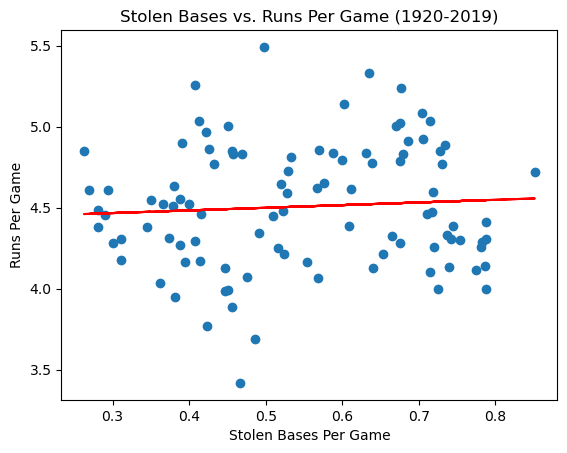

In [23]:
plt.scatter(reduced_hitting_df["stolen_bases_per_game"], reduced_hitting_df["runs_per_game_new"], marker="o")

plt.xlabel("Stolen Bases Per Game")
plt.ylabel("Runs Per Game")
plt.title("Stolen Bases vs. Runs Per Game (1920-2019)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(reduced_hitting_df["stolen_bases_per_game"], reduced_hitting_df["runs_per_game_new"])
regress_values = reduced_hitting_df["stolen_bases_per_game"] * slope + intercept
plt.plot(reduced_hitting_df["stolen_bases_per_game"],regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()